In [33]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.linear_model import LinearRegression
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
x=X['AGE'].values

In [34]:
from sklearn.preprocessing import PolynomialFeatures
degree_1=PolynomialFeatures(degree=1)
degree_2=PolynomialFeatures(degree=2)
degree_3=PolynomialFeatures(degree=3)
degree_4=PolynomialFeatures(degree=4)
x_1=degree_1.fit_transform(x[:,None])
x_2=degree_2.fit_transform(x[:,None])
x_3=degree_3.fit_transform(x[:,None])
x_4=degree_4.fit_transform(x[:,None])

In [35]:
lin_1d = LinearRegression()
lin_1d.fit(x_1,y)
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)
lin_3d = LinearRegression()
lin_3d.fit(x_3,y)
lin_4d = LinearRegression()
lin_4d.fit(x_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

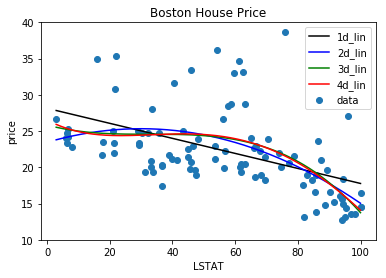

In [36]:
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(degree_1.fit_transform(n[:,np.newaxis]))
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'k',label='1d_lin')
plt.plot(n,y_2d_fit,'b',label='2d_lin')
plt.plot(n,y_3d_fit,'g',label='3d_lin')
plt.plot(n,y_4d_fit,'r',label='4d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [37]:
mean_squared_error(y,lin_1d.predict(x_1))

26.754508704139504

In [38]:
mean_squared_error(y,lin_2d.predict(x_2))

24.397088136515954

In [39]:
mean_squared_error(y,lin_3d.predict(x_3))


23.978242199677435

In [40]:
mean_squared_error(y,lin_4d.predict(x_4))

23.95681697681929